In [14]:
import pandas as pd
import json

In [20]:
with open('../Downloads/Vivan/input_files/benchling_entries.json', 'r') as f:
    json_data = json.load(f)
json_data

{'entries': [{'apiURL': 'https://mpt.benchling.com/api/v2/entries/etr_Ynv6NsAv',
   'archiveRecord': None,
   'assignedReviewers': [],
   'authors': [{'handle': 'deisy', 'id': 'ent_vRpaIaoa', 'name': 'Deisy'}],
   'createdAt': '2022-03-10T20:01:24.774455+00:00',
   'creator': {'handle': 'deisy', 'id': 'ent_vRpaIaoa', 'name': 'Deisy'},
   'customFields': {},
   'days': [{'date': '2022-03-10',
     'notes': [{'indentation': 0,
       'links': [{'id': 'ent_8Rmcoydf',
         'type': 'user',
         'webURL': 'https://mpt.benchling.com/nvillegas/'}],
       'text': 'The variant selection was performed by Nahuel Villegas and took two working days. ',
       'type': 'text'},
      {'indentation': 0, 'links': [], 'text': '', 'type': 'text'},
      {'indentation': 0, 'links': [], 'text': 'Full data', 'type': 'text'},
      {'indentation': 0,
       'links': [],
       'text': 'The following link contains the variant analysis results: ',
       'type': 'text'},
      {'indentation': 0,
      

In [29]:
#get patient ID
json_data['entries'][0]['name'].split('.')[0]

'Pat046'

In [73]:
#get up and down genes
for i in range(len(json_data['entries'][0]['days'][0]['notes'])):
    if 'table' in json_data['entries'][0]['days'][0]['notes'][i].keys():

        #got up genes
        if json_data['entries'][0]['days'][0]['notes'][i]['table']['name'] == 'Genes to up regulate':
            
            for j in range(len(json_data['entries'][0]['days'][0]['notes'][i]['table']['rows'])):
                print(json_data['entries'][0]['days'][0]['notes'][i]['table']['rows'][j]['cells'][0]['text'])
        
        #got down genes
        if json_data['entries'][0]['days'][0]['notes'][i]['table']['name'] == 'Genes to down regulate':
            
            for j in range(len(json_data['entries'][0]['days'][0]['notes'][i]['table']['rows'])):
                print(json_data['entries'][0]['days'][0]['notes'][i]['table']['rows'][j]['cells'][0]['text'])
        

Hs-PTEN
Hs-KRAS


In [113]:

table_dict = {'patID':[], 'upHsgene':[], 'upDmgene':[], 'upDELDUPL':[], 'upConfidence':[], 'upComments':[],
             'downHsgene':[], 'downDmgene':[], 'downDELDUPL':[], 'downConfidence':[], 'downComments':[]}


In [114]:
# whole parsing function

for n in range(len(json_data['entries'])):
    
    patID = json_data['entries'][n]['name'][:6]
    
    upHsgene = ''
    upDmgene = '' 
    upDELDUPL = ''
    upConfidence = ''
    upComments = ''
    downHsgene = ''
    downDmgene = ''
    downDELDUPL= ''
    downConfidence = ''
    downComments=''
    
    for i in range(len(json_data['entries'][n]['days'][0]['notes'])):
        if 'table' in json_data['entries'][n]['days'][0]['notes'][i].keys():
    
            if json_data['entries'][n]['days'][0]['notes'][i]['table']['name'] == 'Genes to up regulate':
            
                for j in range(len(json_data['entries'][n]['days'][0]['notes'][i]['table']['rows'])):
                    upHsgene = upHsgene + json_data['entries'][n]['days'][0]['notes'][i]['table']['rows'][j]['cells'][0]['text'].replace('Hs-', '') + ','
                    upDmgene = upDmgene + json_data['entries'][n]['days'][0]['notes'][i]['table']['rows'][j]['cells'][1]['text'].replace('Dm-', '') + ','
                    upDELDUPL = upDELDUPL + json_data['entries'][n]['days'][0]['notes'][i]['table']['rows'][j]['cells'][2]['text'] + ','
                    upConfidence = upConfidence + json_data['entries'][n]['days'][0]['notes'][i]['table']['rows'][j]['cells'][3]['text'] + ','
                    upComments = upComments + json_data['entries'][n]['days'][0]['notes'][i]['table']['rows'][j]['cells'][4]['text'] + ','
        
        
            if json_data['entries'][n]['days'][0]['notes'][i]['table']['name'] == 'Genes to down regulate':
            
                for j in range(len(json_data['entries'][n]['days'][0]['notes'][i]['table']['rows'])):
                    downHsgene = downHsgene + json_data['entries'][n]['days'][0]['notes'][i]['table']['rows'][j]['cells'][0]['text'].replace('Hs-', '') + ','
                    downDmgene = downDmgene + json_data['entries'][n]['days'][0]['notes'][i]['table']['rows'][j]['cells'][1]['text'].replace('Dm-', '') + ','
                    downDELDUPL = downDELDUPL + json_data['entries'][n]['days'][0]['notes'][i]['table']['rows'][j]['cells'][2]['text'] + ','
                    downConfidence = downConfidence + json_data['entries'][n]['days'][0]['notes'][i]['table']['rows'][j]['cells'][3]['text'] + ','
                    downComments = downComments + json_data['entries'][n]['days'][0]['notes'][i]['table']['rows'][j]['cells'][4]['text'] + ','
                    
            print(patID)
            print(n, i)
            print(table_dict)
                    
                
    table_dict['patID'].append(patID)
    table_dict['upHsgene'].append(upHsgene[:-1])
    table_dict['upDmgene'].append(upDmgene[:-1])
    table_dict['upDELDUPL'].append(upDELDUPL[:-1])
    table_dict['upConfidence'].append(upConfidence[:-1])
    table_dict['upComments'].append(upComments[:-1])
    table_dict['downHsgene'].append(downHsgene[:-1])
    table_dict['downDmgene'].append(downDmgene[:-1])
    table_dict['downDELDUPL'].append(downDELDUPL[:-1])
    table_dict['downConfidence'].append(downConfidence[:-1])
    table_dict['downComments'].append(downComments[:-1])
            
            
    

Pat046
0 11
{'patID': [], 'upHsgene': [], 'upDmgene': [], 'upDELDUPL': [], 'upConfidence': [], 'upComments': [], 'downHsgene': [], 'downDmgene': [], 'downDELDUPL': [], 'downConfidence': [], 'downComments': []}
Pat046
0 12
{'patID': [], 'upHsgene': [], 'upDmgene': [], 'upDELDUPL': [], 'upConfidence': [], 'upComments': [], 'downHsgene': [], 'downDmgene': [], 'downDELDUPL': [], 'downConfidence': [], 'downComments': []}
Pat046
0 17
{'patID': [], 'upHsgene': [], 'upDmgene': [], 'upDELDUPL': [], 'upConfidence': [], 'upComments': [], 'downHsgene': [], 'downDmgene': [], 'downDELDUPL': [], 'downConfidence': [], 'downComments': []}
Pat002
1 8
{'patID': ['Pat046'], 'upHsgene': ['KRAS'], 'upDmgene': ['Ras85D'], 'upDELDUPL': ['To be filled'], 'upConfidence': ['To be filled'], 'upComments': ['To be filled'], 'downHsgene': ['PTEN'], 'downDmgene': ['Pten'], 'downDELDUPL': ['To be filled'], 'downConfidence': ['To be filled'], 'downComments': ['To be filled']}
Pat002
1 9
{'patID': ['Pat046'], 'upHsgene'

In [97]:
table_dict['patID'].append('d')

In [116]:
table_dict

{'patID': ['Pat046',
  'Pat002',
  'Pat009',
  'Pat004',
  'Pat057',
  'Pat044',
  'Pat032',
  'Pat012',
  'Pat007',
  'Pat027'],
 'upHsgene': ['KRAS',
  'KRAS,GNAS',
  'KRAS,MYC',
  'HRAS,AKT1S1,CALR',
  'CCND1,MYCN,FLT4,FGFR3,FGF3,FGF4',
  'KRAS',
  'KRAS',
  'To be filled',
  'SMC1A',
  'GNAS,CCNE1,AURKA,TSHZ2,TSHZ3'],
 'upDmgene': ['Ras85D',
  'Ras85D,galphas',
  'Ras85D,Myc',
  'Ras85D,PRAS40,Calr',
  'CycD,Hs-MYC,Pvr,htl,htl,htl',
  'Ras85D',
  'Ras85D',
  'To be filled',
  'SMC1',
  'galphas,CycE,aurA,tsh,tsh'],
 'upDELDUPL': ['To be filled',
  'To be filled,To be filled',
  'To be filled,To be filled',
  'To be filled,To be filled,',
  'To be filled,To be filled,To be filled,To be filled,To be filled,To be filled',
  'To be filled',
  'To be filled',
  'To be filled',
  'To be filled',
  'To be filled,To be filled,To be filled,To be filled,To be filled'],
 'upConfidence': ['To be filled',
  'To be filled,To be filled',
  'To be filled,To be filled',
  'To be filled,To be filled

In [115]:
table = pd.DataFrame.from_dict(table_dict)
table

,patID,upHsgene,upDmgene,upDELDUPL,upConfidence,upComments,downHsgene,downDmgene,downDELDUPL,downConfidence,downComments
0,Pat046,KRAS,Ras85D,To be filled,To be filled,To be filled,PTEN,Pten,To be filled,To be filled,To be filled
1,Pat002,"KRAS,GNAS","Ras85D,galphas","To be filled,To be filled","To be filled,To be filled","To be filled,To be filled","TSC1,RALBP1,PIGA,APOB,TRIP11,SMAD2","Tsc1,Rlip,PIG-A,Apolpp,Gmap,Smox","To be filled,To be filled,To be filled,To be f...","To be filled,To be filled,To be filled,To be f...","To be filled,To be filled,To be filled,To be f..."
2,Pat009,"KRAS,MYC","Ras85D,Myc","To be filled,To be filled","To be filled,To be filled","To be filled,To be filled","PIK3CA,TP53,APC,ARID1A","Pten,p53,Apc,osa","To be filled,To be filled,To be filled,To be f...","To be filled,To be filled,To be filled,To be f...","To be filled,To be filled,To be filled,To be f..."
3,Pat004,"HRAS,AKT1S1,CALR","Ras85D,PRAS40,Calr","To be filled,To be filled,","To be filled,To be filled,","To be filled,To be filled,","PTEN,TP53,PBRM1,DAXX","Pten,p53,polybromo,Daxx","To be filled,To be filled,To be filled,To be f...","To be filled,To be filled,To be filled,To be f...","To be filled,To be filled,To be filled,To be f..."
4,Pat057,"CCND1,MYCN,FLT4,FGFR3,FGF3,FGF4","CycD,Hs-MYC,Pvr,htl,htl,htl","To be filled,To be filled,To be filled,To be f...","CNVs, dulpl,CNVs, dulpl,CNVs, dulpl,CNVs, dulp...","To be filled,To be filled,To be filled,To be f...",BRCA2,Brca2,To be filled,To be filled,To be filled
5,Pat044,KRAS,Ras85D,To be filled,To be filled,To be filled,"SMAD4, LRP1B","Med,LRP1","To be filled,","To be filled,","To be filled,"
6,Pat032,KRAS,Ras85D,To be filled,To be filled,To be filled,"TP53,STK11,FOXP1,","p53,Lkb1,FoxP,","To be filled,To be filled,To be filled,","To be filled,To be filled,To be filled,","To be filled,To be filled,To be filled,"
7,Pat012,To be filled,To be filled,To be filled,To be filled,,"NF2,ATRX","Mer,XNP","To be filled,To be filled","To be filled,To be filled","To be filled,To be filled"
8,Pat007,SMC1A,SMC1,To be filled,To be filled,To be filled,"KMT2D,SMARCA4,KDM6A,PTEN,STAG1,MYO1C,CEBPA","trr,brm,Utx,Pten,SA,Myo61F,slbo","To be filled,To be filled,To be filled,To be f...","To be filled,To be filled,To be filled,To be f...","To be filled,To be filled,To be filled,To be f..."
9,Pat027,"GNAS,CCNE1,AURKA,TSHZ2,TSHZ3","galphas,CycE,aurA,tsh,tsh","To be filled,To be filled,To be filled,To be f...","To be filled,To be filled,To be filled,To be f...","To be filled,To be filled,To be filled,To be f...","TP53,KMT2C","p53,trr","To be filled,To be filled","To be filled,To be filled","To be filled,To be filled"


In [117]:
table.to_csv('../Downloads/Vivan/parsed_json.csv')

In [193]:
import numpy as np
import seaborn as sns

In [255]:
genes = pd.read_csv('../Downloads/Vivan/input_files/cnv_processed.txt', sep='\t')
genes

/home/olga/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,seqnames,start,end,width,type_alternation,copy_ratio,log_copy_ratio,copy_number,length,file_name,pipeline_name,flank_geneIds,symbol,list_predicting_tools,number_predicting_tools,oncoKB classification,oncoKB classification binary,Patient_ID
0,chr1,818164,121975499,121157336,LOH,NaN,NaN,2.0,121157336,369-T_annotated.SV_CNV_only.vcf,genewiz_canvas_wgs,10022.0,INSL5,"369-T_annotated.SV_CNV_only.vcf, 369-T_S1.cns,...",3,Not cancer related,0,Pat027
1,chr1,818164,121975499,121157336,LOH,NaN,NaN,2.0,121157336,369-T_annotated.SV_CNV_only.vcf,genewiz_canvas_wgs,93611.0,FBXO44,"369-T_annotated.SV_CNV_only.vcf, 369-T_S1.cns,...",3,Not cancer related,0,Pat027
2,chr1,818164,121975499,121157336,LOH,NaN,NaN,2.0,121157336,369-T_annotated.SV_CNV_only.vcf,genewiz_canvas_wgs,6886.0,TAL1,"369-T_annotated.SV_CNV_only.vcf, 369-T_S1.cns,...",3,oncogene,1,Pat027
3,chr1,818164,121975499,121157336,LOH,NaN,NaN,2.0,121157336,369-T_annotated.SV_CNV_only.vcf,genewiz_canvas_wgs,2166.0,FAAH,"369-T_annotated.SV_CNV_only.vcf, 369-T_S1.cns,...",3,Not cancer related,0,Pat027
4,chr1,818164,121975499,121157336,LOH,NaN,NaN,2.0,121157336,369-T_annotated.SV_CNV_only.vcf,genewiz_canvas_wgs,1579.0,CYP4A11,"369-T_annotated.SV_CNV_only.vcf, 369-T_S1.cns,...",3,Not cancer related,0,Pat027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216194,chrY,19657152,56833716,37176565,NaN,NaN,NaN,1.0,37176565,Pat007_segments.txt,sequenza_vivan,57054.0,DAZ3,Ramos_Vieira_B_Ramos_Vieira_T_ExomeCNV_add_Gen...,3,Not cancer related,0,Pat007
216195,chrY,19657152,56833716,37176565,NaN,NaN,NaN,1.0,37176565,Pat007_segments.txt,sequenza_vivan,246119.0,TTTY10,Ramos_Vieira_B_Ramos_Vieira_T_ExomeCNV_add_Gen...,3,Not cancer related,0,Pat007
216196,chrY,19657152,56833716,37176565,NaN,NaN,NaN,1.0,37176565,Pat007_segments.txt,sequenza_vivan,5940.0,RBMY1A1,Ramos_Vieira_B_Ramos_Vieira_T_ExomeCNV_add_Gen...,3,Not cancer related,0,Pat007
216197,chrY,19657152,56833716,37176565,NaN,NaN,NaN,1.0,37176565,Pat007_segments.txt,sequenza_vivan,114760.0,TTTY3,Ramos_Vieira_B_Ramos_Vieira_T_ExomeCNV_add_Gen...,3,Not cancer related,0,Pat007


In [256]:
for name in genes.columns:
    if sum(genes[name].isna()) != 0:
        print(name)
        print(sum(genes[name].isna()))

type_alternation
98295
copy_ratio
125527
log_copy_ratio
125527
copy_number
60497
flank_geneIds
1964
symbol
1985


In [203]:
# nan placeholders

# type_alteration NOSYMBOL
# copy_ratio 0
# log_copy_ratio 0
# copy_number -1
# flank_geneIds 0
# symbol NOSYMBOL

In [288]:
genes['symbol']=genes['symbol'].replace('NULL','NOSYMBOL')

In [266]:
sum(genes['flank_geneIds']==0)

0

In [267]:
genes['flank_geneIds']=genes['flank_geneIds'].fillna(0)

<AxesSubplot:xlabel='copy_ratio', ylabel='Count'>

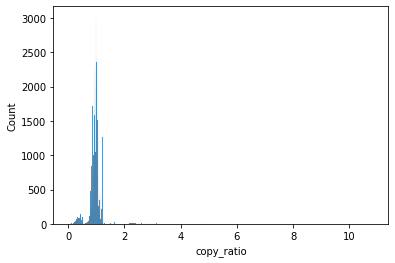

In [194]:
sns.histplot(genes['copy_ratio'])

<AxesSubplot:xlabel='log_copy_ratio', ylabel='Count'>

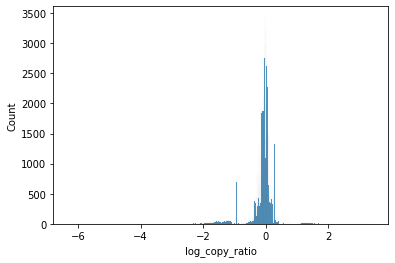

In [197]:
sns.histplot(genes['log_copy_ratio'])

<AxesSubplot:xlabel='copy_number', ylabel='Count'>

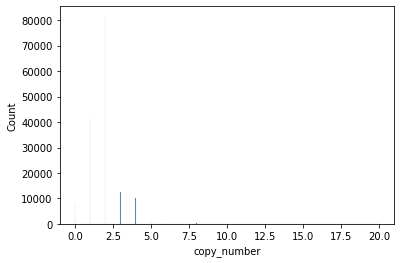

In [201]:
sns.histplot(genes['copy_number'])

<AxesSubplot:xlabel='flank_geneIds', ylabel='Count'>

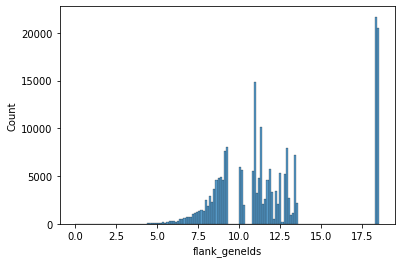

In [211]:
sns.histplot(np.log(genes['flank_geneIds']))

In [279]:
for name in genes.columns:
    if sum(genes[name] == np.nan)!=0:
        print(name)
        print(sum(genes[name] == 'nan'))

In [290]:
genes.to_csv('../Downloads/Vivan/input_files/cnv_processed_nan_processed.txt', sep='\t', index=False)

In [231]:
test = list(genes.iterrows())

In [237]:
list_rows = []
for i, row in genes.iterrows():
    list_rows.append(tuple(row))